## Problem Statement

You work for a fitness company and have gathered data on the fitness activities of 50 individuals using fitness trackers. The dataset is stored in an Excel file named "fitness_data.xlsx" and includes the following columns:

- **name:** Name of the person.
- **steps_taken:** The number of steps taken by individuals.
- **calories_burned:** The estimated calories burned by individuals.
- **sleep_duration(hours):** The number of hours of sleep individuals got on that day.
- **water_intake(ounces):** The amount of water individuals consumed.


In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


**Import Necessary Libraries**

## Task1

1. Import the data from the "fitness_data.xlsx" Excel file.
2. Display the first few rows of the dataset to get an overview.
3. Calculate and display basic statistics (mean, median, min, max) for each column.


In [18]:
df = pd.read_excel("fitness_data.xlsx")
df.head()

,name,steps_taken,calories_burned,sleep_duration(hours),water_intake(ounces)
0,Akshay,10500,4500,7.5,80
1,Priya,9800,4200,7.2,75
2,Raj,11500,4800,7.0,90
3,Emily,12000,5000,7.8,85
4,Rohit,8900,4000,7.0,70


In [19]:
df.head(0)


,name,steps_taken,calories_burned,sleep_duration(hours),water_intake(ounces)


In [20]:
# Calculate mean, median, min, max for each numeric column
stats = df[["steps_taken", "calories_burned", "sleep_duration(hours)", "water_intake(ounces)"]].agg(
    ["mean", "median", "min", "max"]
).T

stats

,mean,median,min,max
steps_taken,10316.000,10250.0,8000.0,15000.0
calories_burned,4418.000,4400.0,3700.0,5500.0
sleep_duration(hours),7.396,7.2,4.0,18.0
water_intake(ounces),79.600,80.0,30.0,100.0


## Task2:  Range and IQR

1. Calculate the range of "steps_taken".
2. Calculate the range of "calories_burned".
3. Calculate the Interquartile Range (IQR) for "sleep_duration(hours)".
4. Calculate the IQR for "water_intake(ounces)".

In [21]:
# Calculate the range of "steps_taken" for the entire week
range_steps = df["steps_taken"].max() - df["steps_taken"].min()
range_calories = df["calories_burned"].max() - df["calories_burned"].min()


# Calculate the range of "calories_burned" for the entire week

# Calculate the Interquartile Range (IQR) for "sleep_duration(hours)"
q1_sleep = df["sleep_duration(hours)"].quantile(0.25)
q3_sleep = df["sleep_duration(hours)"].quantile(0.75)
iqr_sleep = q3_sleep - q1_sleep

# Calculate the IQR for "water_intake(ounces)"
q1_water = df["water_intake(ounces)"].quantile(0.25)
q3_water = df["water_intake(ounces)"].quantile(0.75)
iqr_water = q3_water - q1_water

# Print the results
range_steps, range_calories, (q1_sleep, q3_sleep, iqr_sleep), (q1_water, q3_water, iqr_water)

(np.int64(7000),
 np.int64(1800),
 (np.float64(7.0), np.float64(7.5), np.float64(0.5)),
 (np.float64(70.0), np.float64(90.0), np.float64(20.0)))

## Task3: Box Plot for Steps Taken

- Create a box plot for the "steps_taken" column to visualize the distribution of daily steps taken by individuals. Interpret the box plot and identify any outliers.

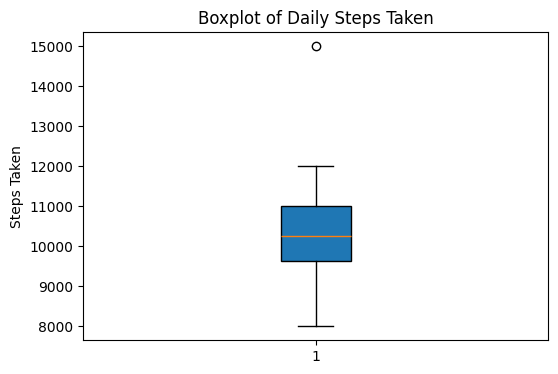

In [22]:


# Set the figure size
plt.figure(figsize=(6,4))


# Create a box plot for "Steps Taken"
plt.boxplot(df["steps_taken"], vert=True, patch_artist=True)


# Set the title and labels
plt.title("Boxplot of Daily Steps Taken")
plt.ylabel("Steps Taken")
plt.show()

# Rotate x-axis labels for better readability


# Ensure proper layout and display the plot


#### Observations

- Most individuals appear to have a median daily step count around 10,000 as indicated by the orange line within the box.
- The presence of an outlier at 15,000 indicates that there is at least one individual who took an exceptionally high number of steps. This could be due to various reasons, such as an unusually active day or a measurement error.


## Task4: 

- Use the IQR method to identify and label outliers in the "sleep_duration(hours)" column.

In [23]:
#defininig the function
# Step 1: Calculating Q1, Q3, and IQR
q1 = df["sleep_duration(hours)"].quantile(0.25)
q3 = df["sleep_duration(hours)"].quantile(0.75)
iqr = q3 - q1



In [24]:
#get the lower and upper limits
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [25]:
# Identify and label outliers

df["sleep_outlier"] = ~df["sleep_duration(hours)"].between(lower_bound, upper_bound, inclusive="both")

# Display the outliers
outliers = df[df["sleep_outlier"]]
outliers

,name,steps_taken,calories_burned,sleep_duration(hours),water_intake(ounces),sleep_outlier
21,Elena,11700,4900,18.0,100,True
30,Siddharth,11300,4700,4.0,75,True
